# Fourier

The Fourier transform is a mathematical formula that relates a signal sampled in time or space to the same signal sampled in frequency. In signal processing, the Fourier transform can reveal important characteristics of a signal, namely, its frequency components.

To see its importance first we have to take a look from data collection perspective.

> A continuous signal can be completely recovered from its samples if,
> and only if, the sampling rate is __greater than twice__ the highest frequency
> of the signal.

In [1]:
%%file generate_amplitude_at_time.m
function a = generate_amplitude_at_time(Fc, tv)
% 
% generate_amplitude_at_time(Frequency, time_vector)
% 
% Fc : signal's frequency
% tv : time vector
%
    a = cos(2*pi*Fc*tv);
end

Created file '/mnt/extWork/App/stress_and_addiction/Notebook/generate_amplitude_at_time.m'.


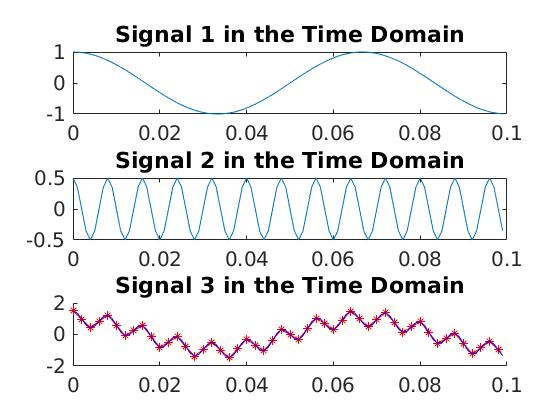

In [2]:
%% Time specifications:
% 1kHz at 1s
Fs = 1000;                    % Sampling frequency
T = 1/Fs;                     % Sampling period
observation_time = 1;         % second
L = Fs * observation_time;    % Length of signal 
t = (0:L-1)*T;                % Time vector

%% Sine wave:
signal_1 = generate_amplitude_at_time(15, t);
signal_2 = generate_amplitude_at_time(125, t) * 0.5;
signal_3 = signal_1 + signal_2;

%%plot native
% Plot the signal versus time:
X = [signal_1; signal_2; signal_3];

% bonus : our own sample
s_Fs = 500;                       % Sampling frequency
s_T = 1/s_Fs;                    % Sampling period
s_L = s_Fs * observation_time;
s_t = (0:s_L-1)*s_T;              % Time vector

show_all = false;
s_X = generate_amplitude_at_time(15, s_t) + generate_amplitude_at_time(125, s_t) * 0.5;

for i = 1:3
    subplot(3,1,i)

    if show_all
        display_range = 1:length(t);   
        display_range_sample = 1:length(s_t);
    else
        display_range = 1:100; % 100 = 0.1 * Fs
        display_range_sample = 1:0.1*s_Fs;
    end
    
    if i < 3
        plot(t(display_range),X(i, display_range)) 
%         plot(t,X)                       % show all (alternative)
        title(['Signal ',num2str(i),' in the Time Domain'])  
    else
        hold on;
        plot(s_t(display_range_sample), s_X(display_range_sample), '-*r');
        
        plot(t(display_range),X(i, display_range), 'b')
        title(['Signal ',num2str(i),' in the Time Domain'])  
        hold off;
    end
end

%%%%%%%-----------------------------------------

### Question:

What will happen if `s_Fs` change to 50, 100, 250, or 500 ?

----

## Plotting Signal in spectrum domain (frequency) ---------------------------------------------

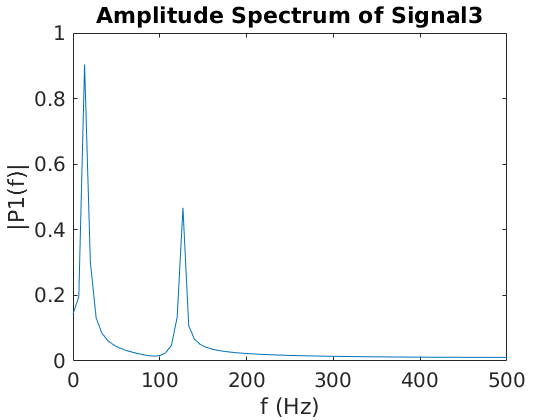

In [41]:
Lx = 150;
Y = fft(signal_3, Lx);  % Y is a array of magnitude per bin of L, the L is optional if scaled properly

P2 = abs(Y/Lx);         % signal below 0 is difficult to compute (because imaginary) so take abs
P1 = P2(1:Lx/2+1);      % and signal are mirrored, we can take only half
P1 = 2*P1;              % and double it to compensate

f = Fs*(0:(Lx/2))/Lx;
figure;
plot(f,P1) 
title('Amplitude Spectrum of Signal3')
xlabel('f (Hz)')
ylabel('|P1(f)|')
% xlim([0 150])


In [42]:
%%file plot_spectrum_of_FFT.m
function [f, P1] = plot_spectrum_of_FFT(Y, L, Fs, title_txt)
%
% plot_spectrum_of_FFT (s_Y, s_L, title_txt)
% 
% Y  = spectrum vector
% L  = signal length
% Fs = sampling frequency
% title_txt = plot title
% f  = frequency range
% P1 = normalized Spectrum

    P2 = abs(Y/L);                      % signal below 0 is difficult to compute (imaginary)
    P1 = P2(1:L/2+1);                    % and since it is a mirror, we can take only half
    P1(2:end-1) = 2*P1(2:end-1);        % and double it to compensate

    f = Fs*(0:(L/2))/L;
    plot(f, P1) 
    title(title_txt)
    xlabel('f (Hz)')
    ylabel('|P1(f)|')
end

Created file '/mnt/extWork/App/stress_and_addiction/Notebook/plot_spectrum_of_FFT.m'.


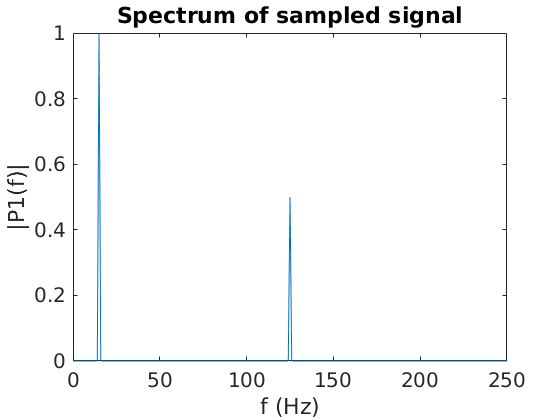

In [43]:
s_Y = fft(s_X, s_L);
[s_f, s_Spectrum] = plot_spectrum_of_FFT(s_Y, s_L, s_Fs, 'Spectrum of sampled signal');

## Cleaning the signals ---------------------------------------------

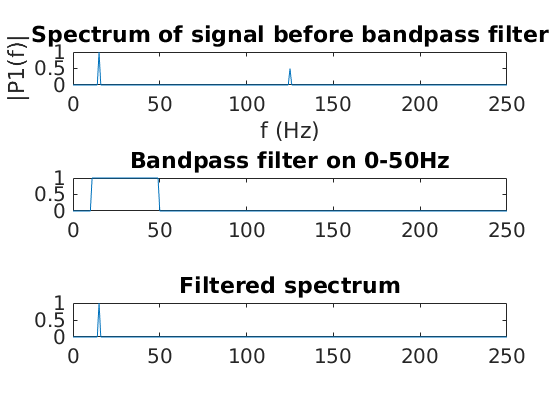

In [44]:
subplot(3,1,1);
s_f = plot_spectrum_of_FFT(s_Y, s_L, s_Fs, 'Spectrum of signal before bandpass filter');

subplot(3,1,2);
lower_freq = 10;
upper_freq = 50;
BPF = ((lower_freq < abs(s_f)) & (abs(s_f) < upper_freq));
plot(s_f,BPF);
title('Bandpass filter on 0-50Hz')

subplot(3,1,3);
cleaned_spectrum = BPF.*s_Spectrum;
plot(s_f,abs(cleaned_spectrum));
title('Filtered spectrum')

### Reconstructing signals ---------------------------------------------

In [ ]:
n_Fs = 2000;                     % new Sampling Frequency
n_T = 1/n_Fs;                    % new Sampling period
n_L = n_Fs * observation_time;
n_t = (0:n_L-1)*n_T;  

signal=ifft(cleaned_spectrum, n_Fs);                   % inverse ifft
signal = signal * n_Fs;                                % scaling in time domain

plot(n_t, signal)
xlim([0 0.1])
ylim([-1 1])
title('Reconstructed signal')
